# About Graduate Admission Dataset

The dataset encompasses a collection of crucial parameters utilized in the evaluation process for admission into Masters Programs. These pivotal factors encompass:

1. **GRE Scores:** Represented on a scale of 0 to 340, the GRE scores serve as a standardized assessment to gauge the applicant's aptitude and proficiency in various academic fields.

2. **TOEFL Scores:** Measured on a scale of 0 to 120, the TOEFL scores assess the English language proficiency of international applicants, ensuring their ability to cope with the linguistic demands of the program.

3. **University Rating:** Rated on a scale of 0 to 5, this parameter provides insights into the reputation and quality of the candidate's previous educational institutions.

4. **Statement of Purpose and Letter of Recommendation Strength:** Evaluated on a scale of 0 to 5, this criterion gauges the persuasive power and efficacy of the applicant's statement of purpose and letters of recommendation, which reflect their motivation, aspirations, and support from mentors.

5. **Undergraduate GPA:** Rated on a scale of 0 to 10, the undergraduate GPA offers a quantitative measure of the applicant's academic performance during their previous studies.

6. **Research Experience:** A binary factor represented as either 0 or 1, indicating the presence or absence of research experience in the applicant's academic journey.

7. **Chance of Admit:** Ranging from 0 to 1, this parameter acts as the predicted probability of the applicant's successful admission into the Masters Program based on the aforementioned factors.

By incorporating these diverse parameters, the dataset provides a comprehensive and holistic view of the candidates, enabling admission committees to make informed decisions while selecting individuals who demonstrate the potential to excel in their chosen Masters Program.


In [2]:
# imort all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVR
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [5]:
# Read the dataset
dataframe = pd.read_csv("C:/Users/amite/Desktop/Admission_Predict.csv")
dataframe.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# Exploratory Data Analysis

In [6]:
# check the info of data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [7]:
# Describe the statistics of data
dataframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
# shape of data
dataframe.shape

(400, 9)

In [9]:
# check the duplicate values in the dataset
dataframe.duplicated().sum()

0

In [10]:
# check is there any null value in the dataset
dataframe.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
# check the correlation matrix 
correlation_matrix= dataframe.corr()
correlation_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


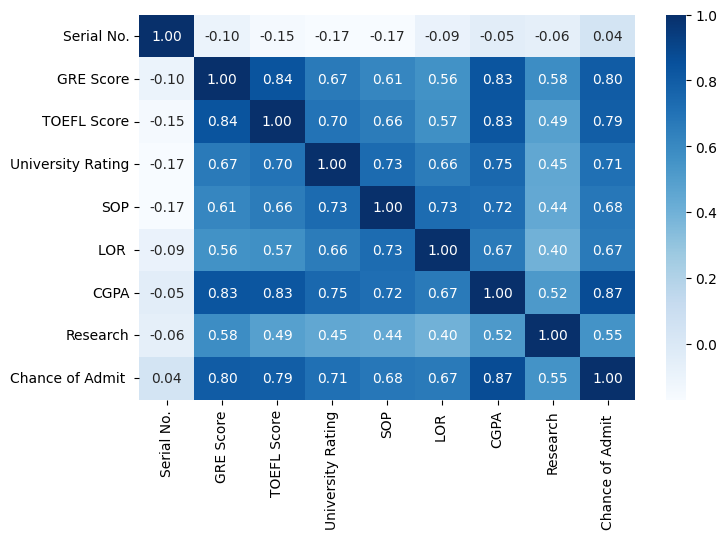

In [12]:
# Plot the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt='.2f')
plt.show()

In [13]:
# Let's drop the serial No. from the dataset
dataframe.drop("Serial No.", axis=1, inplace=True)

In [14]:
# check the shape of the data
dataframe.shape

(400, 8)

In [15]:
columns= dataframe.columns.to_list()
columns[4]="LOR"
columns[7]="Chance of Admit"
dataframe.columns= columns
columns= dataframe.columns.to_list()
columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance of Admit']

# Univariate Analysis

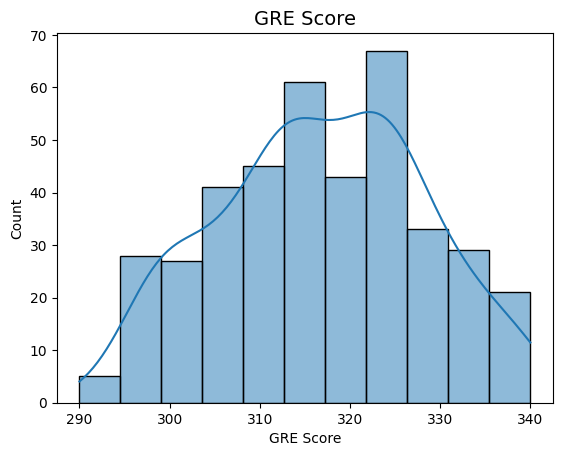

In [16]:
# Density plot for GRE
sns.histplot(dataframe["GRE Score"], kde=True)
plt.title("GRE Score", fontsize=14)
plt.xlabel("GRE Score")
plt.ylabel("Count")
plt.show()

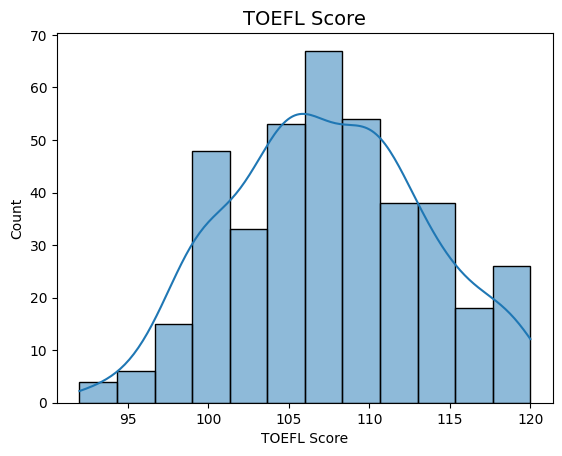

In [17]:
#  plot for TOFEL
sns.histplot(dataframe["TOEFL Score"], kde=True)
plt.title("TOEFL Score", fontsize=14)
plt.xlabel("TOEFL Score")
plt.ylabel("Count")
plt.show()

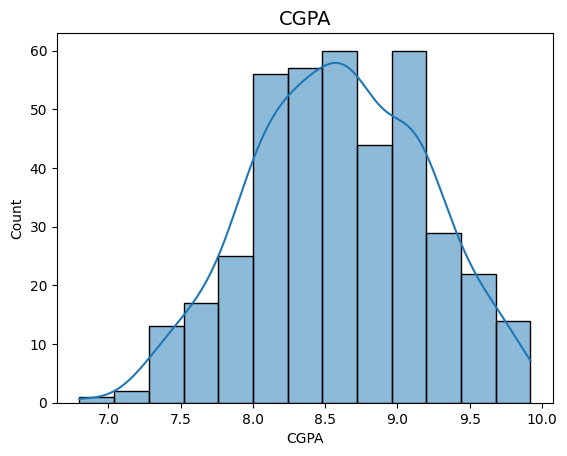

In [18]:
# plot for TOFEL
sns.histplot(dataframe["CGPA"], kde=True)
plt.title("CGPA", fontsize=14)
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()

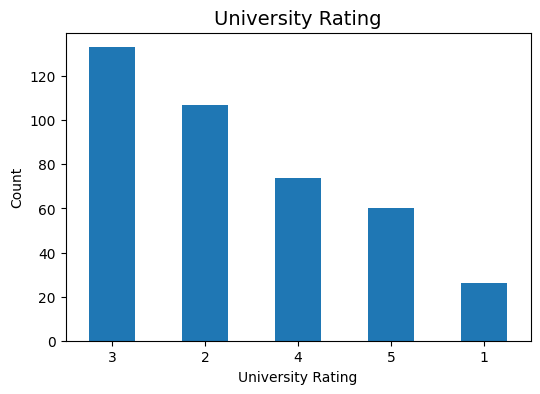

In [19]:
# Frequency plot for University Rating
dataframe["University Rating"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("University Rating", fontsize=14)
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

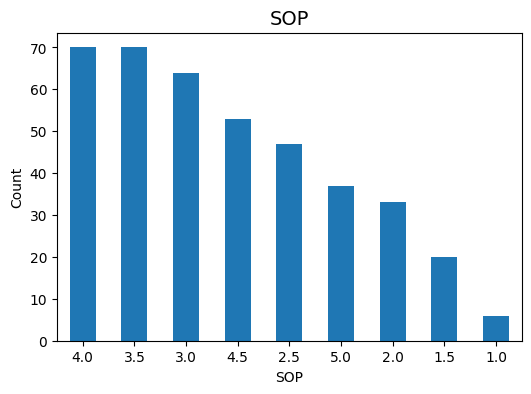

In [20]:
# Frequency plot for SOP
dataframe["SOP"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("SOP", fontsize=14)
plt.xlabel("SOP")
plt.ylabel("Count")
plt.show()

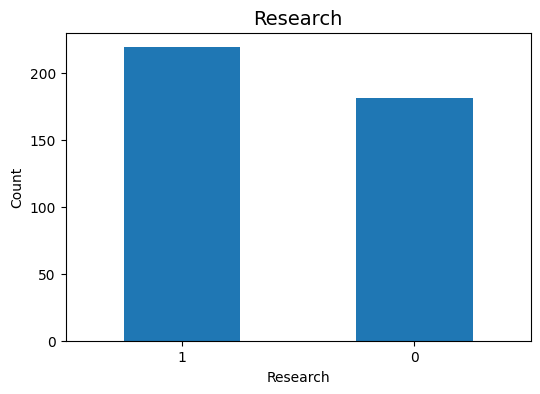

In [21]:
# Frequency plot for research
dataframe["Research"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("Research", fontsize=14)
plt.xlabel("Research")
plt.ylabel("Count")
plt.show()

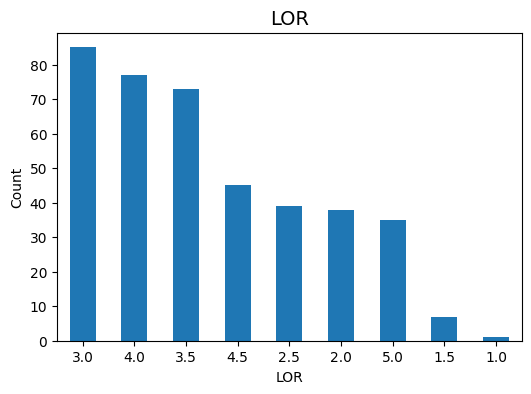

In [22]:
# Frequency plot for LOR
dataframe["LOR"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("LOR", fontsize=14)
plt.xlabel("LOR")
plt.ylabel("Count")
plt.show()

# Bivariate Analaysis
Bivariate analysis using Violin plot to see the impact of SOP, LOR, Research and Universiy Rating on Chance of Admit.

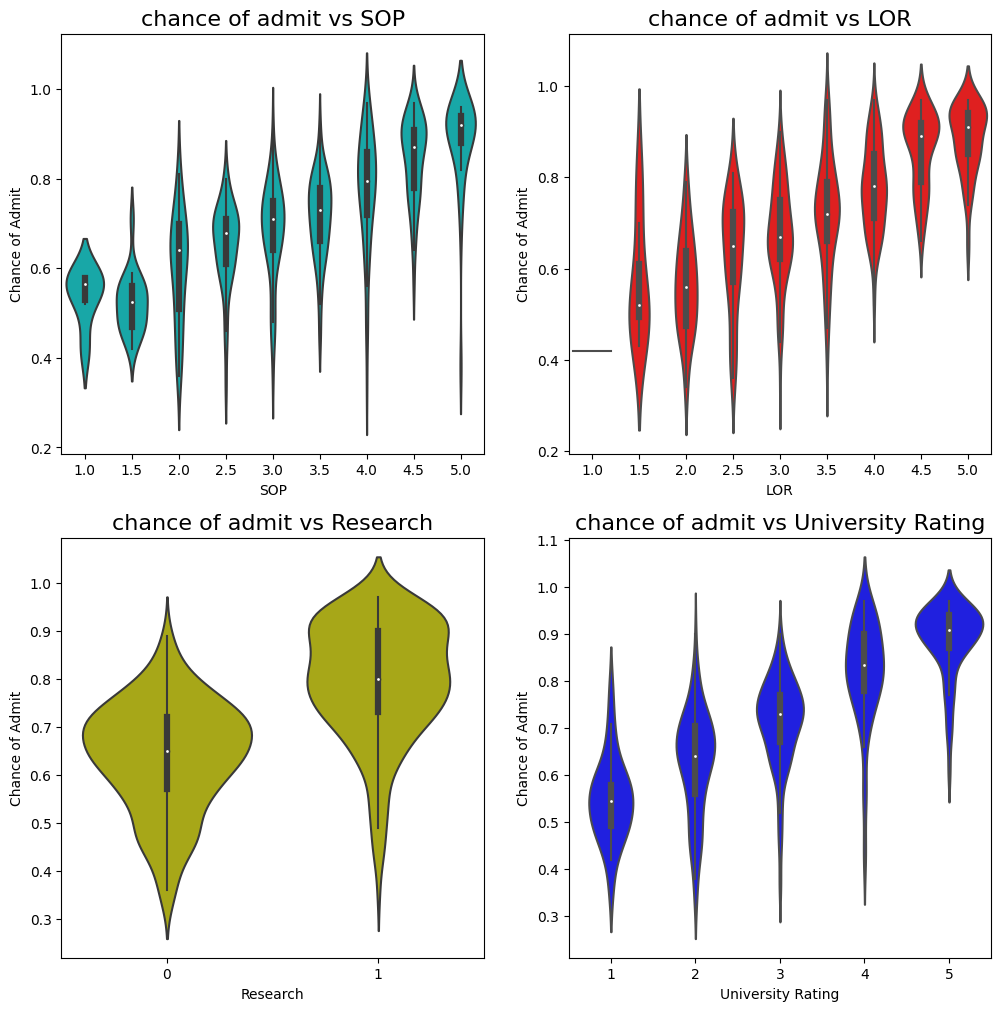

In [23]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(221)
sns.violinplot(data=dataframe, x=dataframe["SOP"], y=dataframe["Chance of Admit"], hue=None ,color='c',ax=ax)
ax.set_title('chance of admit vs SOP', fontsize=16)

ax=fig.add_subplot(222)
sns.violinplot(data=dataframe, x=dataframe["LOR"], y=dataframe["Chance of Admit"], hue=None ,color='r',ax=ax)
ax.set_title('chance of admit vs LOR', fontsize=16)

ax=fig.add_subplot(223)
sns.violinplot(data=dataframe, x=dataframe["Research"], y=dataframe["Chance of Admit"], hue=None ,color='y',ax=ax)
ax.set_title('chance of admit vs Research', fontsize=16)

ax=fig.add_subplot(224)
sns.violinplot(data=dataframe, x=dataframe["University Rating"], y=dataframe["Chance of Admit"], hue=None ,color='b',ax=ax)
ax.set_title('chance of admit vs University Rating', fontsize=16)

plt.show()

# Scatter Plot of CGPA, GRE Score and TOEFL Score with Chance of Admit

<Figure size 500x500 with 0 Axes>

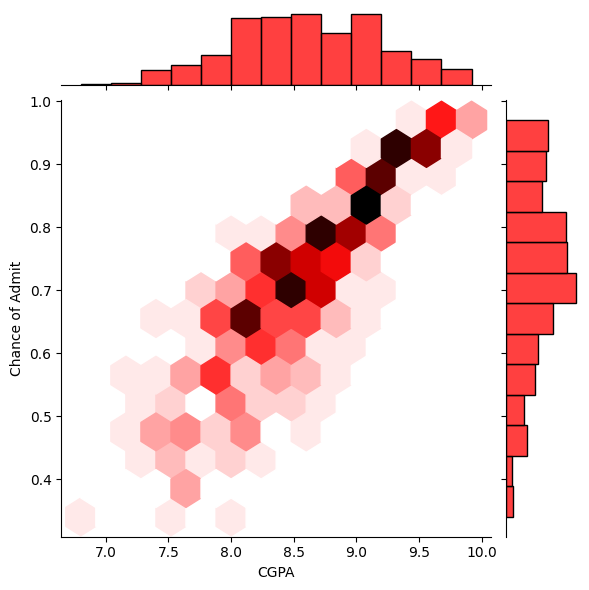

In [24]:
# hexabining plot 
plt.figure(figsize=(5,5))
sns.jointplot(x=dataframe["CGPA"], y=dataframe["Chance of Admit"], kind="hex", color="r")

<Figure size 500x500 with 0 Axes>

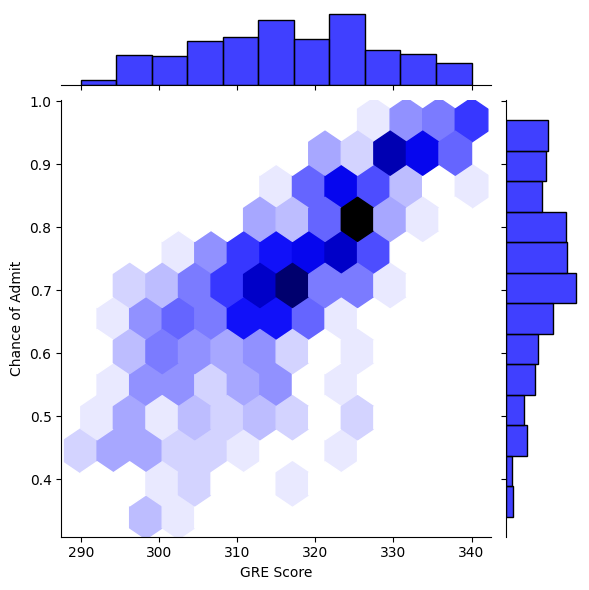

In [25]:
plt.figure(figsize=(5,5))
sns.jointplot(x=dataframe["GRE Score"], y=dataframe["Chance of Admit"], kind="hex", color="b")

<Figure size 500x500 with 0 Axes>

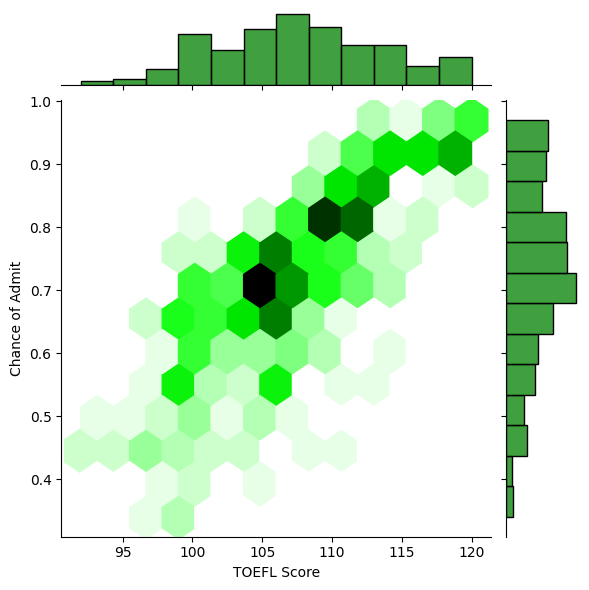

In [26]:
fig=plt.figure(figsize=(5,5))
sns.jointplot(x=dataframe["TOEFL Score"], y=dataframe["Chance of Admit"], kind="hex", color="g")

# Let's detect the outliers in the dataset
For detecting the outliers in the dataset we find the 95th percentile of each column and see the values that are covered under 95th percentile.

In [27]:
# Find the 95th percentile of each column
GRE_Score=np.quantile(dataframe["GRE Score"], 0.95)
print(f"GRE_Score at 95th Percentile: {GRE_Score}")

TOEFL_Score=np.quantile(dataframe["TOEFL Score"], 0.95)
print(f"TOEFL Score at 95th Percentile: {TOEFL_Score}")

CGPA=np.quantile(dataframe["CGPA"], 0.95)
print(f"CGPA at 95th Percentile:{CGPA}")

University_Rate=np.quantile(dataframe["University Rating"], 0.95)
print(f"University Rating at 95th Percentile: {University_Rate}")

SOP=np.quantile(dataframe["SOP"], 0.95)
print(f"SOP at 95th Percentile: {SOP}")


LOR=np.quantile(dataframe["LOR"], 0.95)
print(f"LOR at 95th Percentile: {LOR}")

GRE_Score at 95th Percentile: 336.0
TOEFL Score at 95th Percentile: 118.0
CGPA at 95th Percentile:9.600999999999999
University Rating at 95th Percentile: 5.0
SOP at 95th Percentile: 5.0
LOR at 95th Percentile: 5.0


# From the above values it is cleared that there is no outliers in the dataset,because the values that we are find at 95th percentile, closer to maximum value of each column that we see where we describe our dataset.

# Q-Q Plot

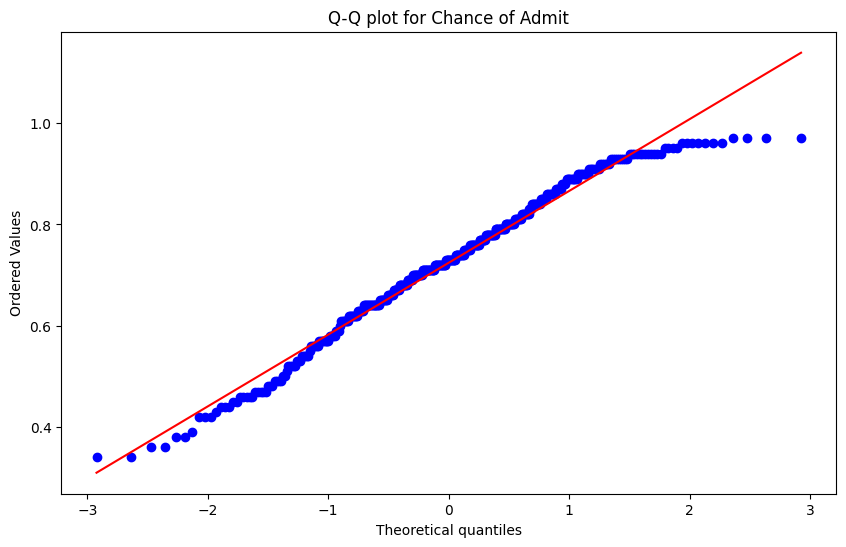

In [28]:
plt.figure(figsize=(10,6))
stats.probplot(dataframe["Chance of Admit"], plot= plt, dist="norm")
plt.title('Q-Q plot for Chance of Admit')
plt.show()

# Check the Multicollineraity Using VIF

In [29]:
# Standardise the data
std = StandardScaler()
x = dataframe.drop('Chance of Admit', axis=1)
y = dataframe['Chance of Admit']
cols = x.columns
x[cols] = std.fit_transform(x[cols])
x.shape

(400, 7)

# Calculate the Variance Inflation Factor for all columns

In [30]:
VIF = pd.DataFrame()
Features=x
print(Features.columns)
VIF['features'] = Features.columns
print(Features.shape)
print(Features.shape[0])
print(Features.shape[1])
VIF['VIF'] = [variance_inflation_factor(Features.values, i) for i in range(Features.shape[1])]
print(VIF)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')
(400, 7)
400
7
            features       VIF
0          GRE Score  4.615516
1        TOEFL Score  4.288959
2  University Rating  2.919606
3                SOP  3.075504
4                LOR  2.431258
5               CGPA  5.207403
6           Research  1.543312


Here we can see that the VIF of CGPA column is 5.2, but when we see the correlation matrix then we came to know that CGPA column has individually impact on the Chance of Admit, regardless this column is highly correleated with others.So, we decided not to drop this column.

# OLS (Ordinary Least Squared) Regression is the most simple linear regression model also known as the base model for Linear Regression. 
 OLS is an estimator in which the values of slope and intercept are chosen in such a way as to minimize the sum of the squares of the differences between the observed dependent variable and predicted dependent variable. That’s why it’s named ordinary least squares.

In [31]:
x_sm = sm.add_constant(x)
sm_model = sm.OLS(y,x_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Fri, 04 Aug 2023   Prob (F-statistic):          3.12e-134
Time:                        15:19:36   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7244      0.00

# Split the data into train and test split

In [32]:
x_train, x_test, y_train, y_test= train_test_split(dataframe.drop("Chance of Admit", axis=1),
                                                   dataframe["Chance of Admit"],
                                                   test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

# Data Preprocessing using StandardScaler

In [33]:
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

# Modelling

In [34]:
result={}

models = {'DecisionTree': DecisionTreeRegressor(),
          'Linear Regression': LinearRegression(),
          'RandomForest': RandomForestRegressor(),
          'KNeighbours': KNeighborsRegressor(n_neighbors = 2),
           'SVM': SVR(),
           'AdaBoostClassifier': AdaBoostRegressor(),
           'GradientBoostingClassifier': GradientBoostingRegressor(),
           'Xgboost': XGBRegressor(),
           'Lasso':  Lasso(),
           'Ridge':  Ridge(),
           'BayesianRidge':  BayesianRidge(),
           'ElasticNet': ElasticNet(),
           }


for key,value in models.items():
    temp=[]
    model =value
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test, predictions))
    temp.append(rmse)
    result[key]=temp
    
    
print(result)

{'DecisionTree': [0.10857025375304231], 'Linear Regression': [0.07013454019296414], 'RandomForest': [0.07438623024458224], 'KNeighbours': [0.08499264674076222], 'SVM': [0.07649655647817487], 'AdaBoostClassifier': [0.07684619413855347], 'GradientBoostingClassifier': [0.07991322699540543], 'Xgboost': [0.08046068590830273], 'Lasso': [0.15895686570969497], 'Ridge': [0.07015597221818451], 'BayesianRidge': [0.0702363501834385], 'ElasticNet': [0.15895686570969497]}


# Results

In [35]:
result=pd.DataFrame(result)
result=result.T
result

,0
DecisionTree,0.108570
Linear Regression,0.070135
RandomForest,0.074386
KNeighbours,0.084993
SVM,0.076497
AdaBoostClassifier,0.076846
GradientBoostingClassifier,0.079913
Xgboost,0.080461
Lasso,0.158957
Ridge,0.070156


In [36]:
col=result.columns.to_list()
col[0]="Root Mean Squared Error"
result.columns=col
result

,Root Mean Squared Error
DecisionTree,0.108570
Linear Regression,0.070135
RandomForest,0.074386
KNeighbours,0.084993
SVM,0.076497
AdaBoostClassifier,0.076846
GradientBoostingClassifier,0.079913
Xgboost,0.080461
Lasso,0.158957
Ridge,0.070156


# Visualising the Result using Bar Plot

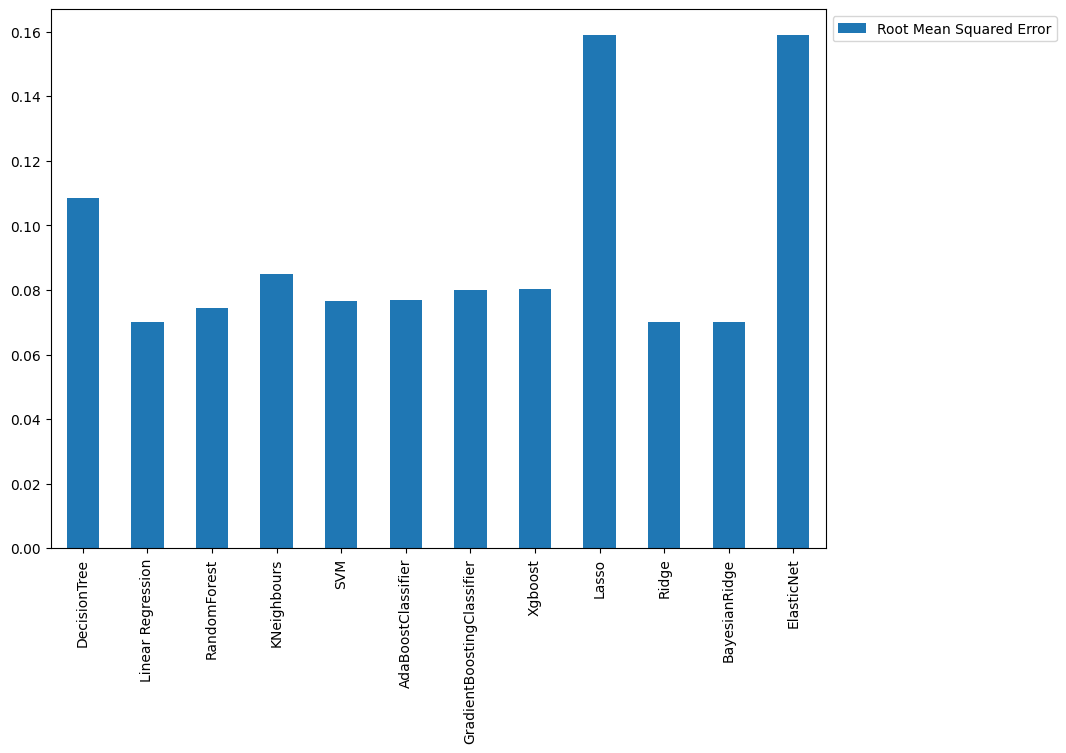

In [37]:
result.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

# Conclusion
1. In this dataset we try to predict the Chance of Admission based on various input features. We perform the Univariate and Bivariate Analysis to see the impact of different input varibales on chance of Admit.
2. We detect the outliers in the dataset with help of Percentile Capping, and there are no outliers in the dataset.
3. We also try to find the Multicollinearity using Variance Inflation Method.
4. We also create the summary of model with the help of OLS Regression Model and see the value of different parameters.We find that the slope of University Rating and SOP is below Zero, which means these column has less important for predicting the chance of Admit.
5. At the end we find that the Ridge Regression perform very well among all the regression models.